In [4]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Path to the directory containing the Pokémon images
dataset_path = "PokemonData"

In [5]:
# Define image dimensions and batch size
img_width, img_height = 150, 150
batch_size = 32

# Create data generators for training and validation sets
train_datagen = ImageDataGenerator(
  rescale=1./255,
  shear_range=0.2,
  zoom_range=0.2,
  horizontal_flip=True,
  validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
  dataset_path,
  target_size=(img_width, img_height),
  batch_size=batch_size,
  class_mode='categorical',
  subset='training'
)

validation_generator = train_datagen.flow_from_directory(
  dataset_path,
  target_size=(img_width, img_height),
  batch_size=batch_size,
  class_mode='categorical',
  subset='validation'
)

Found 5511 images belonging to 150 classes.
Found 1309 images belonging to 150 classes.


In [3]:
model = Sequential([
  Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
  MaxPooling2D((2, 2)),
  Conv2D(64, (3, 3), activation='relu'),
  MaxPooling2D((2, 2)),
  Conv2D(128, (3, 3), activation='relu'),
  MaxPooling2D((2, 2)),
  Conv2D(256, (3, 3), activation='relu'), # Added another convolutional layer
  MaxPooling2D((2, 2)),
  Flatten(),
  Dense(128, activation='relu'),
  Dense(150, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [4]:
history = model.fit(
  train_generator,
  steps_per_epoch=train_generator.samples // batch_size,
  epochs=20,
  validation_data=validation_generator,
  validation_steps=validation_generator.samples // batch_size
)

Epoch 1/20
172/172 [==============================] - 77s 444ms/step - loss: 4.8975 - accuracy: 0.0113 - val_loss: 4.5659 - val_accuracy: 0.0250
Epoch 2/20
172/172 [==============================] - 73s 425ms/step - loss: 4.1789 - accuracy: 0.0653 - val_loss: 4.0328 - val_accuracy: 0.0938
Epoch 3/20
172/172 [==============================] - 73s 426ms/step - loss: 3.6029 - accuracy: 0.1374 - val_loss: 3.3435 - val_accuracy: 0.1914
Epoch 4/20
172/172 [==============================] - 74s 431ms/step - loss: 3.1497 - accuracy: 0.2280 - val_loss: 3.0550 - val_accuracy: 0.2375
Epoch 5/20
172/172 [==============================] - 73s 426ms/step - loss: 2.7310 - accuracy: 0.3190 - val_loss: 2.6793 - val_accuracy: 0.3320
Epoch 6/20
172/172 [==============================] - 73s 425ms/step - loss: 2.3516 - accuracy: 0.3957 - val_loss: 2.4389 - val_accuracy: 0.3938
Epoch 7/20
172/172 [==============================] - 89s 520ms/step - loss: 2.0360 - accuracy: 0.4612 - val_loss: 2.4392 - val_ac

In [5]:
# Save the model
model.save("pokemon_cnn_model.h5")

c:\Users\Vincent\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [15]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Load the saved model
model = load_model("pokemon_cnn_model.h5")

# Path to the directory containing the Pokémon images
dataset_path = "PokemonData"

# Define image dimensions
img_width, img_height = 150, 150

# Function to predict Pokémon from an image file and return the predicted class along with its image
def predict_pokemon_with_image(image_path):
    img = image.load_img(image_path, target_size=(img_width, img_height))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)
    
    # Get the label (Pokémon name) of the predicted class
    predicted_pokemon = train_generator.class_indices
    predicted_pokemon = dict((v,k) for k,v in predicted_pokemon.items())
    predicted_pokemon = predicted_pokemon[predicted_class]
    
    # Load the image of the predicted Pokémon class
    predicted_image_path = os.path.join(dataset_path, predicted_pokemon, os.listdir(os.path.join(dataset_path, predicted_pokemon))[0])
    predicted_img = image.load_img(predicted_image_path, target_size=(img_width, img_height))
    
    return predicted_class, predicted_pokemon, img, predicted_img

# Example usage
def compare_images(image_path):
    predicted_class, predicted_pokemon, uploaded_img, predicted_img = predict_pokemon_with_image(image_path)
    
    # Plot the images
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(uploaded_img)
    axes[0].set_title("Uploaded Image")
    axes[0].axis('off')
    axes[1].imshow(predicted_img)
    axes[1].set_title(f"Predicted Pokémon: {predicted_pokemon}")
    axes[1].axis('off')
    plt.show()

1/1 [==============================] - 0s 25ms/step


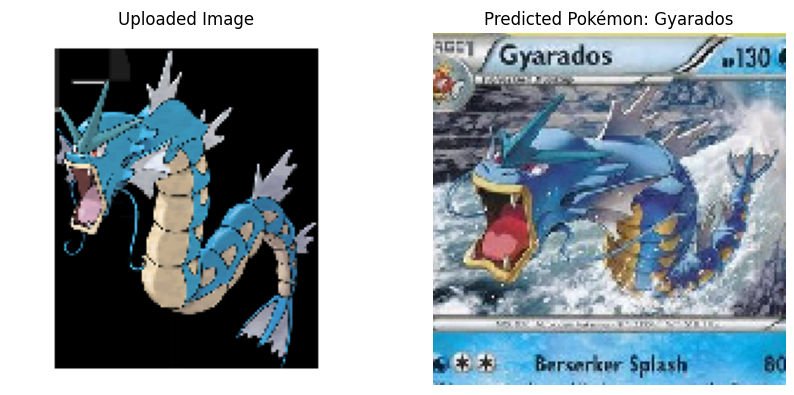

In [33]:
# Example usage with a path to the image you want to classify
image_path = "PokemonData/130.png"
compare_images(image_path)